In [26]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [27]:
# Imports
import sys
import joblib
import numpy as np
from math import atan2
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [28]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [29]:
%matplotlib inline

In [30]:
%store -r X_motion_CoM_acc_absolute
%store -r Y_motion_CoM_acc_absolute
print(X_motion_CoM_acc_absolute.shape)
print(Y_motion_CoM_acc_absolute.shape)

(9780, 28)
(9780, 2)


# Multivariate Linear Regression (Foot prediction)

In [31]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
# Entries where FL foot is swinging
idx_fl_rr_swinging = np.where(X_motion_CoM_acc_absolute[:, 21] == 1)[0]
X_motion_CoM_acc_absolute_FL_RR = X_motion_CoM_acc_absolute[idx_fl_rr_swinging]
Y_motion_CoM_acc_absolute_FL_RR = Y_motion_CoM_acc_absolute[idx_fl_rr_swinging]

In [33]:
idx_fl_rr_swinging.shape

(4892,)

## Predict CoM -> x

In [34]:
X_motion_CoM_acc_absolute_FL_RR[0, :]

array([0.0, 0.0, -0.10000000149011612, 0.0322352146407956,
       -0.16707049163546253, 0.01633024113261936, -0.050864724772716724,
       0.01613139346307927, -0.08244774950818047, 0.2242183589315502,
       0.21463290253635245, -0.4047964527433376, 0.23125327710299393,
       -0.1859196351448079, -0.40580275730170523, -0.25716170429661755,
       0.1535668459650834, -0.40042184496154315, -0.2596469020780039,
       -0.1333438735060659, -0.4003938266901496, True, False, False, True,
       0.0, 0.0, 0.0], dtype=object)

In [35]:
Y_motion_CoM_acc_absolute_FL_RR[0, :]

array([-0.0014475170967571671, 0.022369409865341083], dtype=object)

### Linear Regression

In [63]:
# Input
X = np.hstack((X_motion_CoM_acc_absolute_FL_RR[:, :3], # previous motion command
               X_motion_CoM_acc_absolute_FL_RR[:, -3:], # commanded motion command
               X_motion_CoM_acc_absolute_FL_RR[:, 3:9], # odom velocities
               X_motion_CoM_acc_absolute_FL_RR[:, 9:11], # FL (x,y) position
               X_motion_CoM_acc_absolute_FL_RR[:, 12:14], # FR (x,y) position
               X_motion_CoM_acc_absolute_FL_RR[:, 15:17], # RL (x,y) position
               X_motion_CoM_acc_absolute_FL_RR[:, 18:20])) # RR (x,y) position

# Labels
Y = np.array([Y_motion_CoM_acc_absolute_FL_RR[:, 0]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fl_com_x = LinearRegression()

# Fit the model
model_fl_com_x.fit(X_train, Y_train)

# Predict
predictions = model_fl_com_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9213040292223666
RMSE:  0.01157548345109085
The lowest error is:  1.008674309303792e-05
The highest error is:  0.05227585561615132
The avg. error is:  0.007962336623068056


In [64]:
model_fl_com_x.coef_

array([[ 0.02388812,  0.12072007, -0.00153214,  0.06135513, -0.00516689,
        -0.04768366,  0.01284948,  0.00480223, -0.09878998,  0.02392297,
         0.04972781, -0.07514635,  0.27739971, -0.43901943,  0.02963638,
        -0.75670172,  0.58245151, -0.76950869, -0.37429812, -0.17543078]])

In [65]:
model_fl_com_x.intercept_

array([0.02949681])

Text(0, 0.5, 'Predictions')

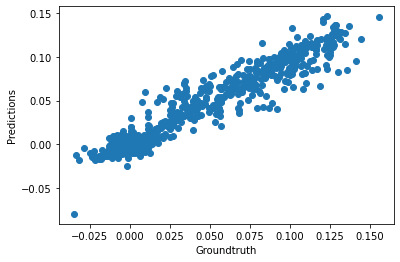

In [66]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [67]:
#%store model_fl_com_x

In [68]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [69]:
# Save model
#joblib.dump(model_fl_com_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fl_com_x.sav")

## Predict FL foot -> y

### Linear Regression

In [80]:
# Input
X = np.hstack((X_motion_CoM_acc_absolute_FL_RR[:, :3], # previous motion command
               X_motion_CoM_acc_absolute_FL_RR[:, -3:], # commanded motion command
               X_motion_CoM_acc_absolute_FL_RR[:, 3:9], # odom velocities
               X_motion_CoM_acc_absolute_FL_RR[:, 9:11], # FL (x,y) position
               X_motion_CoM_acc_absolute_FL_RR[:, 12:14], # FR (x,y) position
               X_motion_CoM_acc_absolute_FL_RR[:, 15:17], # RL (x,y) position
               X_motion_CoM_acc_absolute_FL_RR[:, 18:20])) # RR (x,y) position

# Labels
Y = np.array([Y_motion_CoM_acc_absolute_FL_RR[:, 1]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fl_com_y = LinearRegression()

# Fit the model
model_fl_com_y.fit(X_train, Y_train)

# Predict
predictions = model_fl_com_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.8808415764706826
RMSE:  0.009841671332635547
The lowest error is:  7.662251720743501e-06
The highest error is:  0.056978651037245864
The avg. error is:  0.00665620347769712


In [81]:
model_fl_com_y.coef_

array([[ 3.46228577e-02,  1.53876199e-01,  1.22390167e-01,
        -1.52389410e-02,  5.39452813e-02,  1.92226499e-02,
         2.92674471e-03,  2.13090530e-02, -5.20527349e-04,
         6.64204068e-03,  2.35308163e-02, -1.22337553e-01,
         1.45084021e-01,  2.14312430e-01, -2.69302963e-02,
         3.63619804e-02, -7.21408304e-02, -5.25549936e-01,
        -6.71586928e-02,  1.20483259e-01]])

In [82]:
model_fl_com_y.intercept_

array([0.01716566])

Text(0, 0.5, 'Predictions')

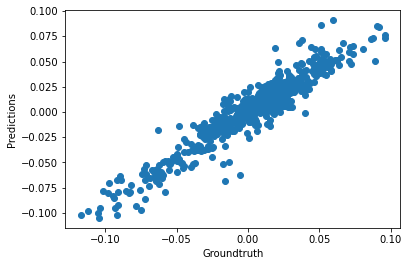

In [83]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Groundtruth")
plt.ylabel("Predictions")

In [84]:
#%store model_fl_com_y

In [83]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [84]:
# Save model
#joblib.dump(model_fl_com_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/model_fl_com_y.sav")